# Data analysis on 2+1D CDT universes

Author: Seda den Boer

Date: 04/04/2024

In [1]:
# Load packages
import sys
sys.path.append('..')
from typing import Dict, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import pickle
import networkx as nx
import math
from matplotlib.tri import Triangulation
from classes.universe import Universe
from classes.helper_functions.helpers import get_spatial_neighbours, get_vertices_in_slice

In [2]:
# Load files
k0_values = [0, 1, 2, 3, 4, 5, 6, 7]
k3_init_guess = [1.0417799999999955, 1.1760799999999827, 1.3237199999999882, 1.4782399999999793, 1.6480799999999842, 1.8284799999999846, 2.0621400000000256, 2.3117000000000187]
filenames = [f'measurements/simulation_k0={k0}_tswps=0_swps=1000_kstps=1000000_trgtv=10000_trgtv2=0_fx=0_chn=0.pkl.gz' for k0 in k0_values]
data = [pickle.load(gzip.open(filename, 'rb')) for filename in filenames]

In [3]:
# Print fields in data
for key in data[0].keys():
    print(key)

k3
n_slices
expected_n22_n31
expected_n22_n3
acceptance_ratios
succes_rates
total_vertices
total_tetrahedra
total_31_tetrahedra
total_22_tetrahedra
slice_sizes
slab_sizes
curvature_profiles


## Critical $k_3$

In [4]:
# Load file
filepath = '/home/seda2102/epic/CDT/src/2+1/experiments/measurements/critical_k3_T3_trgtvN31=10000.pkl.gz'

with gzip.open(filepath, 'rb') as file:
    k3_data = pickle.load(file)

print(k3_data)

[1.0417799999999955, 1.1760799999999827, 1.3237199999999882, 1.4782399999999793, 1.6480799999999842, 1.8284799999999846, 2.0621400000000256, 2.3117000000000187]


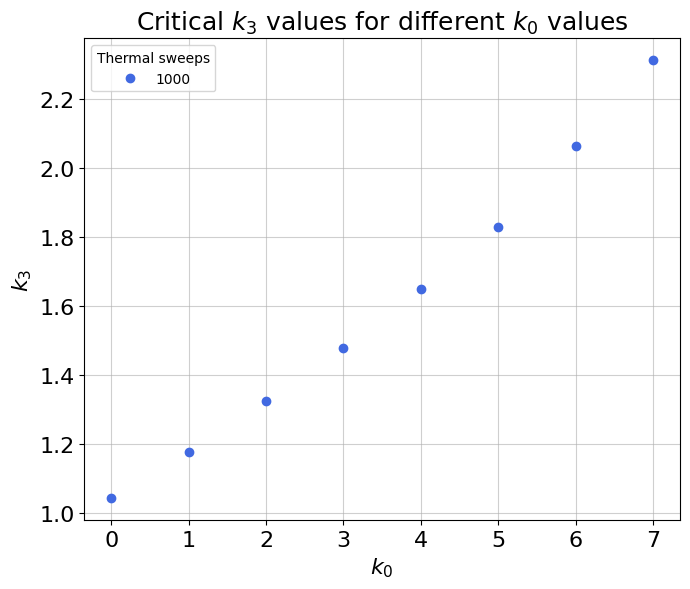

In [5]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.plot(k0_values, k3_data, 'o', color='royalblue', label='1000')  # Plot markers
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()

## Acceptance ratios

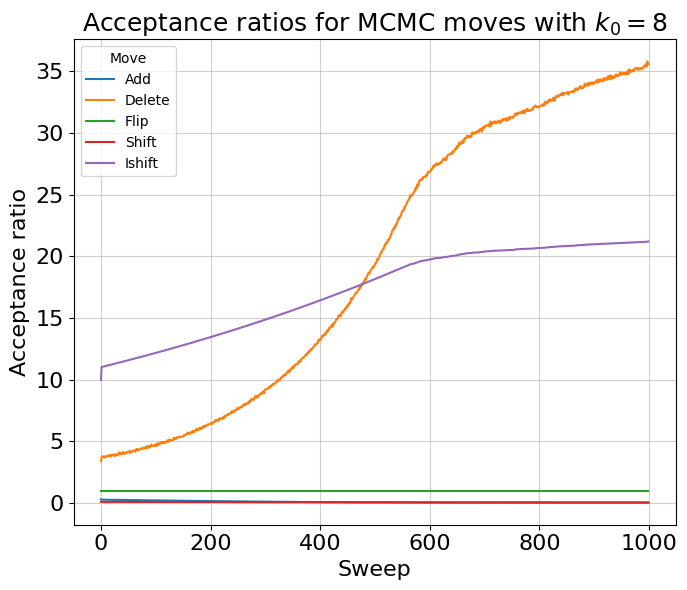

In [14]:
# Load file
filepath = 'measurements/k0=8/outfile_k0=8_tswps=1000_swps=0_kstps=500000_chain=0_acceptance_ratios.npy'
acceptance_ratios = np.load(filepath).T
k0 = 8

# Plot acceptance ratios
plt.figure(figsize=(7, 6))
plt.plot(acceptance_ratios[0], label='Add')
plt.plot(acceptance_ratios[1], label='Delete')
plt.plot(acceptance_ratios[2], label='Flip')
plt.plot(acceptance_ratios[3], label='Shift')
plt.plot(acceptance_ratios[4], label='Ishift')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()


### Zoom-in

## Succes rates

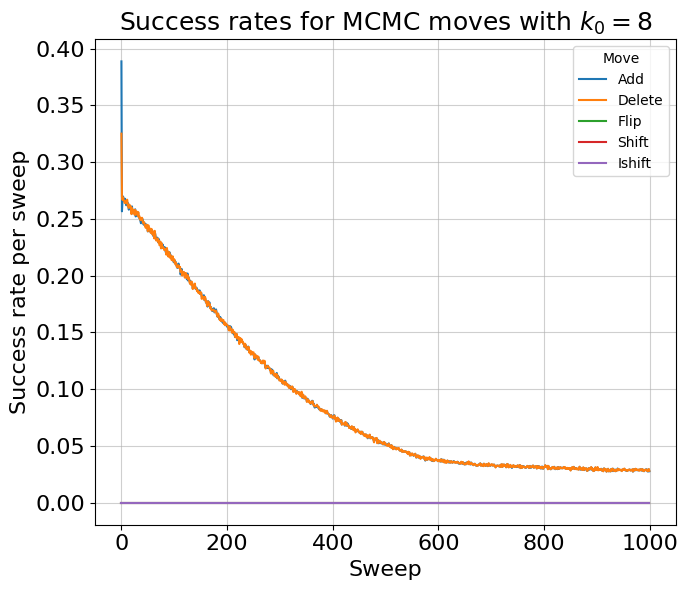

In [16]:
# Load files
filepath_successes = 'measurements/k0=8/outfile_k0=8_tswps=1000_swps=0_kstps=500000_chain=0_successes.npy'
filepath_fails = 'measurements/k0=8/outfile_k0=8_tswps=1000_swps=0_kstps=500000_chain=0_fails.npy'
successes = np.load(filepath_successes).T
fails = np.load(filepath_fails).T

# # Get the success rate 
success_rate = successes / (successes + fails)
k0 = 8

# Plot success rate
plt.figure(figsize=(7, 6))
plt.plot(success_rate[0], label='Add')
plt.plot(success_rate[1], label='Delete')
plt.plot(success_rate[2], label='Flip')
plt.plot(success_rate[3], label='Shift')
plt.plot(success_rate[4], label='Ishift')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate per sweep', fontsize=16)
plt.title(f'Success rates for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()


### Zoom-in

## $<N_{22}/N_{31}>$

### Over time

[30 30 30 ... 30 30 30]
[  30 8542 6928 ... 5272 5232 5220]


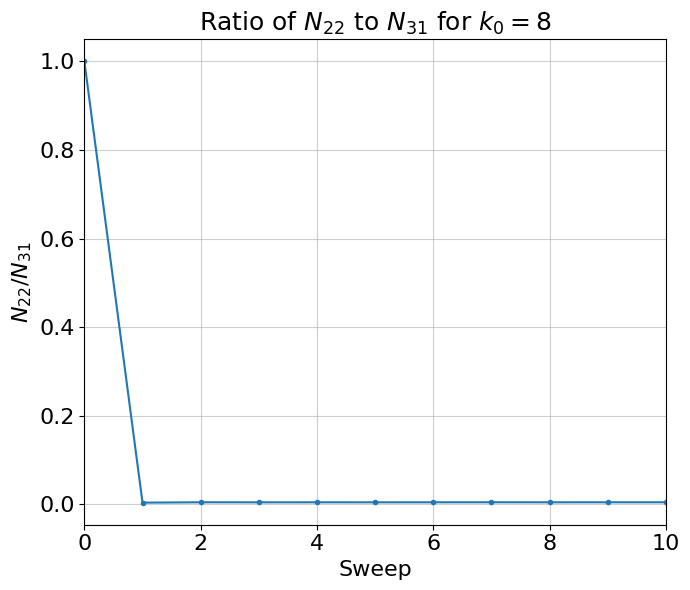

In [22]:
# Load files
filepath_n22 = 'measurements/k0=8/outfile_k0=8_tswps=1000_swps=0_kstps=500000_chain=0_n_tetras_22.npy'
filepath_n31 = 'measurements/k0=8/outfile_k0=8_tswps=1000_swps=0_kstps=500000_chain=0_n_tetras_31.npy'
n_tetras_22 = np.load(filepath_n22)
n_tetras_31 = np.load(filepath_n31)
print(n_tetras_22)
print(n_tetras_31)
# # Get the ratio of n22 to n31
ratio_n22_n31 = n_tetras_22 / n_tetras_31
k0 = 8

# Plot ratio of n22 to n31
plt.figure(figsize=(7, 6))
plt.plot(ratio_n22_n31, '.-')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22} / N_{31}$', fontsize=16)
plt.title('Ratio of $N_{22}$ to $N_{31}$ for ' + f'$k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# Plot from 0 to 100
plt.xlim(0, 10)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()

### Phase transition

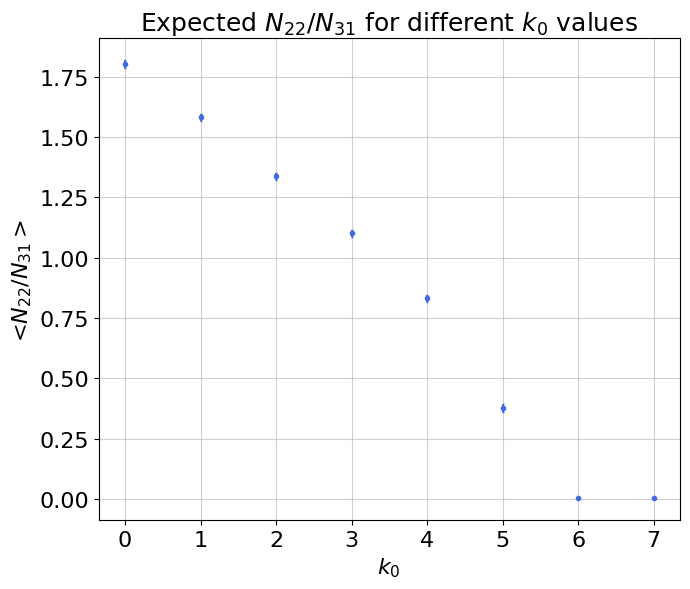

In [9]:
n22_n31_0 = np.array(data[0]['total_22_tetrahedra']) / 10000
n22_n31_1 = np.array(data[1]['total_22_tetrahedra']) / 10000
n22_n31_2 = np.array(data[2]['total_22_tetrahedra']) / 10000
n22_n31_3 = np.array(data[3]['total_22_tetrahedra']) / 10000
n22_n31_4 = np.array(data[4]['total_22_tetrahedra']) / 10000
n22_n31_5 = np.array(data[5]['total_22_tetrahedra']) / 10000
n22_n31_6 = np.array(data[6]['total_22_tetrahedra']) / 10000
n22_n31_7 = np.array(data[7]['total_22_tetrahedra']) / 10000
 
y = [n22_n31_0.mean(), n22_n31_1.mean(), n22_n31_2.mean(), n22_n31_3.mean(), n22_n31_4.mean(), n22_n31_5.mean(), n22_n31_6.mean(), n22_n31_7.mean()]
yerr = [n22_n31_0.std(), n22_n31_1.std(), n22_n31_2.std(), n22_n31_3.std(), n22_n31_4.std(), n22_n31_5.std(), n22_n31_6.std(), n22_n31_7.std()]

# Plot the mean n22/n31 against k0 with the variance 
plt.figure(figsize=(7, 6))
plt.errorbar(k0_values, y, yerr=yerr, fmt='.', color='royalblue', capsize=1)
plt.title('Expected $N_{22} / N_{31}$ for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('<$N_{22} / N_{31}>$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()

## Volume

### Spatial volume

In [10]:
# # Load file
# filepath = 'measurements/test_k0=1_slice_sizes.npy'
# slice_sizes = np.load(filepath)

# print(slice_sizes)

k0 = 0
slice_sizes = data[k0]['slice_sizes']
print(slice_sizes)
# Plot slice sizes
plt.figure(figsize=(7, 6))



[{0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 3344, 2: 3208}, {0: 3448, 1: 

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

### Total tetrahedron volume

In [11]:
# filepath = 'measurements/test_k0=1_slab_sizes.npy'
# slab_sizes = np.load(filepath)

# print(slab_sizes)

## Curvature

## Spectral dimension

In [12]:
def plot_spectral_dimension_per_timeslice(infile: str, diffusion_times: List[int]):
    pass

def plot_spectral_dimension(infile: str, diffusion_times: List[int]):
    pass

## Visualisation

### Network timeslices

In [13]:
def generate_timeslice_graphs(universe: Universe, save: bool, filename: str) -> Dict[int, nx.Graph]:
    T = universe.n_slices
    vertices_in_slice = get_vertices_in_slice(universe)
    spatial_neighbours = get_spatial_neighbours(universe)
    graphs = {t: None for t in range(T)}

    # Generate the graph
    for t, vertex_ids in vertices_in_slice.items():
        G = nx.Graph()

        for vertex_id in vertex_ids:
            vertex = universe.vertex_pool.get(vertex_id)
            G.add_node(
                vertex_id,
                time=vertex.time,
                tetrahedron=vertex.tetra.ID,
                degree=len(universe.vertex_neighbours[vertex.ID]),
                cnum=vertex.cnum,
                scnum=vertex.scnum,
            )
        
        for vertex_id in vertex_ids:
            for spatial_neighbour_id in spatial_neighbours[vertex_id]:
                G.add_edge(vertex_id, spatial_neighbour_id)

        pos = nx.planar_layout(G)
        print(pos)
        for node,(x,y) in pos.items():
            G.nodes[node]['x'] = float(x)
            G.nodes[node]['y'] = float(y)

        graphs[t] = G

        if nx.check_planarity(G):
            print(f'The spatial slice {t} is planar')
        else:
            print(f'The spatial slice {t} is not planar')
            
        if save:
            nx.write_gexf(G, f'{filename}_t={t}.gexf')
    
    return graphs

def visualise_timeslices(graphs: Dict[int, nx.Graph]):
    # Plot each graph
    for t in range(len(graphs)):
        G = graphs[t]

        if G:
            plt.figure()
            pos = nx.spring_layout(G)
            nx.draw(G, pos, node_size=1, node_color="blue")
            plt.title(f"Time slice {t}")
            plt.axis("equal")

In [14]:
# universe_0 = Universe(geometry_infilename=filenames[0])
# graphs = generate_timeslice_graphs(universe_0, True, 'networks/graph_k0=0')

### Triangulation timeslices

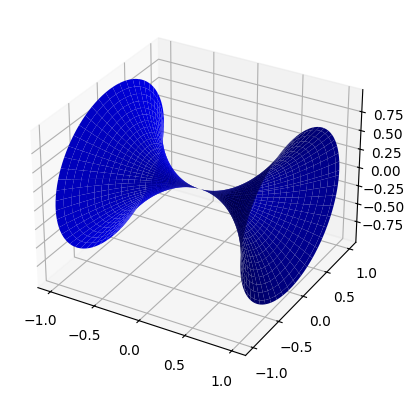

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define the 1D function
def f(x):
    return x**2

# Step 2: Generate points along the function
x = np.linspace(-1, 1, 100)
y = f(x)

# Step 3: Revolve the profile around an axis
theta = np.linspace(0, 2 * np.pi, 100)
X, Theta = np.meshgrid(x, theta)
Y = np.cos(Theta) * y
Z = np.sin(Theta) * y

# Step 4: Plot the 3D object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='b')

3292
8433
8337


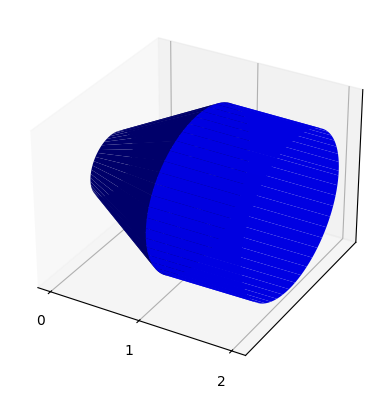

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define the 1D function
def f(x, k0):
    print(data[k0]['slab_sizes'][0][x])
    return data[k0]['slab_sizes'][0][x]

k0 = 6
# Step 2: Generate points along the function
x = [0, 1, 2]
y = [f(x, k0) for x in x]

# Step 3: Revolve the profile around an axis
theta = np.linspace(0, 2 * np.pi, 100)
X, Theta = np.meshgrid(x, theta)
Y = np.cos(Theta) * y
Z = np.sin(Theta) * y

# Step 4: Plot the 3D object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='b')
# Dont show y and z axis
ax.set_yticks([])
ax.set_zticks([])
ax.set_xticks(x)

[]

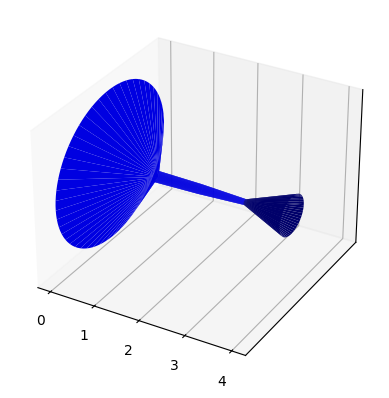

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Step 1: Define the 1D function
def f(x, k0):
    return data[k0]['slice_sizes'][0][x]

def generate_random_data(length, total):
    data = []
    remaining = total
    for _ in range(length - 1):
        value = random.uniform(0, remaining)
        data.append(value)
        remaining -= value
    data.append(remaining)
    random.shuffle(data)
    return data

# Step 2: Generate points along the function
x = [0, 1, 2, 3, 4]
length = 5
total = 5000
y = generate_random_data(length, total)

# Step 3: Revolve the profile around an axis
theta = np.linspace(0, 2 * np.pi, 100)
X, Theta = np.meshgrid(x, theta)
Y = np.cos(Theta) * y
Z = np.sin(Theta) * y

# Step 4: Plot the 3D object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='b')
# Dont show y and z axis
ax.set_yticks([])
ax.set_zticks([])